# Explore here

# Paso 1: Carga del conjunto de datos

In [4]:
import pandas as pd
print("En este cuadro visualizaremos la información demográfica de los pacientes, asi mismo determinara si tiene diabetes o no") 

url = "https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv"
df = pd.read_csv(url)
df.head()

En este cuadro visualizaremos la información demográfica de los pacientes, asi mismo determinara si tiene diabetes o no


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Paso 2: Análisis Exploratorio de Datos (EDA)

In [5]:
# Información básica
df.info()
df.describe()

# Revisamos valores que son cero en columnas clínicas
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
(df[cols_with_zeros] == 0).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [6]:
# Reemplazamos ceros por NaN y luego imputamos con la mediana
import numpy as np

df_clean = df.copy()
df_clean[cols_with_zeros] = df_clean[cols_with_zeros].replace(0, np.nan)
df_clean.fillna(df_clean.median(), inplace=True)

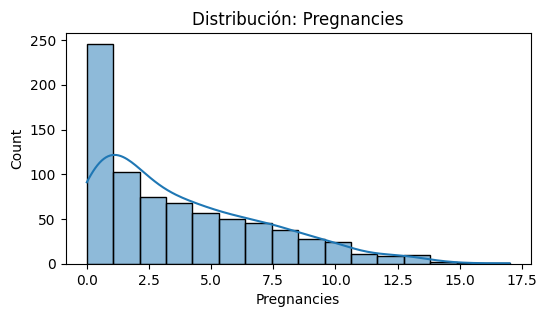

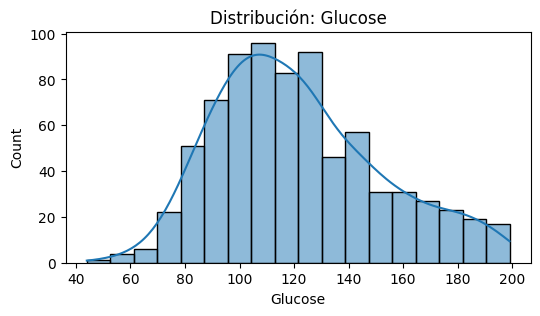

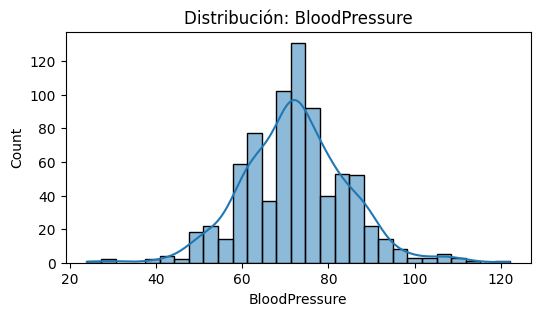

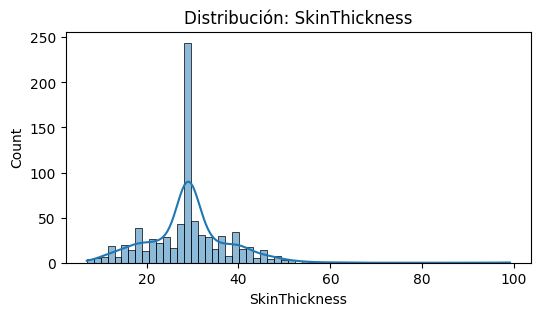

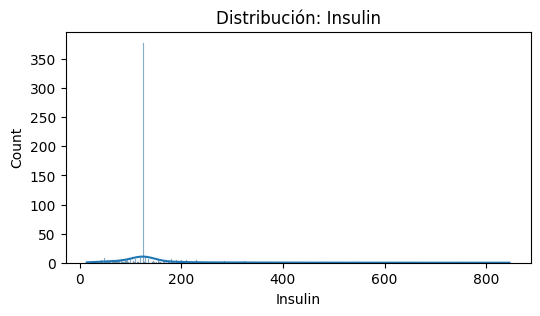

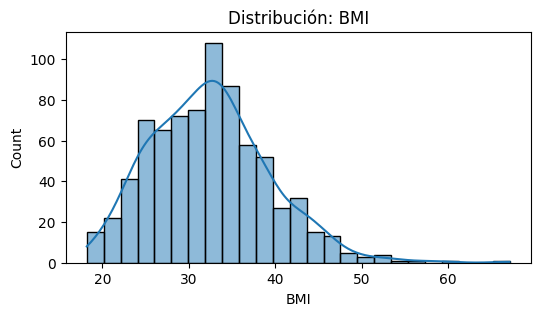

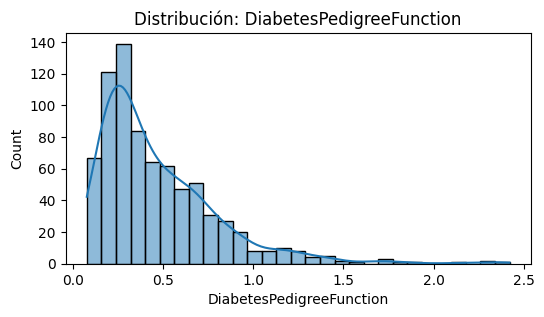

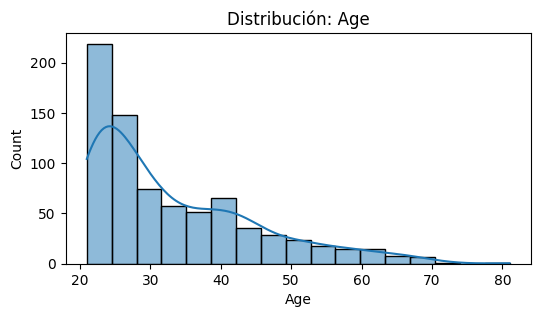

In [20]:
# Visualización univariada
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_clean.columns[:-1]:
    plt.figure(figsize=(6,3))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribución: {col}')
    plt.show()

-La media de embarazos es de aproximadamente 3.8, con una desviación estándar de 3.3. El rango de embarazos va desde 0 hasta 17.

-La media de glucosa es de aproximadamente 121, con una desviación estándar de 30. El rango de glucosa va desde 44 hasta 199.

-La media de presión arterial es de aproximadamente 69, con una desviación estándar de 19. El rango de presión arterial va desde 24 hasta 122.

-La media de grosor de la piel es de aproximadamente 21, con una desviación estándar de 16. El rango de grosor de la piel va desde 7 hasta 99.
-La media de insulina es de aproximadamente 80, con una desviación estándar de 115. El rango de insulina va desde 14 hasta 846.

-La media de IMC es de aproximadamente 32, con una desviación estándar de 7. El rango de IMC va desde 18 hasta 67.

-La media de la función de pedigree de diabetes es de aproximadamente 0.47, con una desviación estándar de 0.33. El rango de la función de pedigree de diabetes va desde 0.08 hasta 2.42.

-La media de edad es de aproximadamente 33, con una desviación estándar de 12. El rango de edad va desde 21 hasta 81.

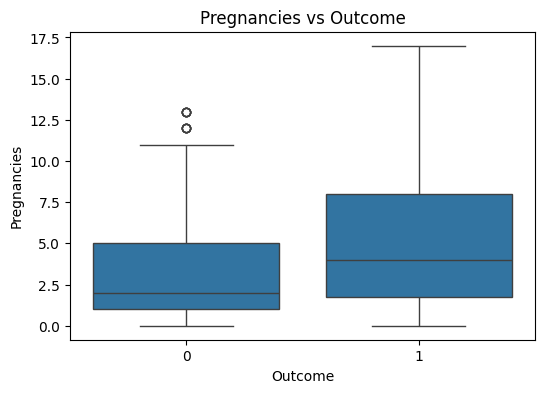

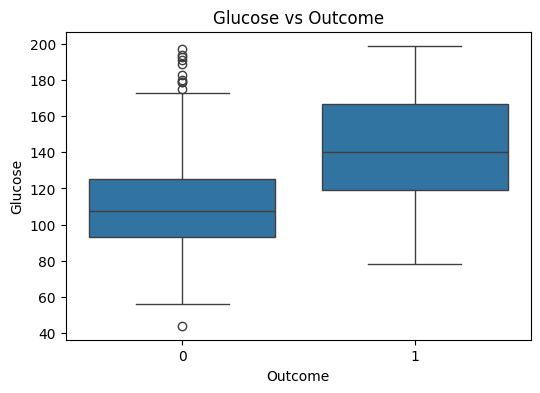

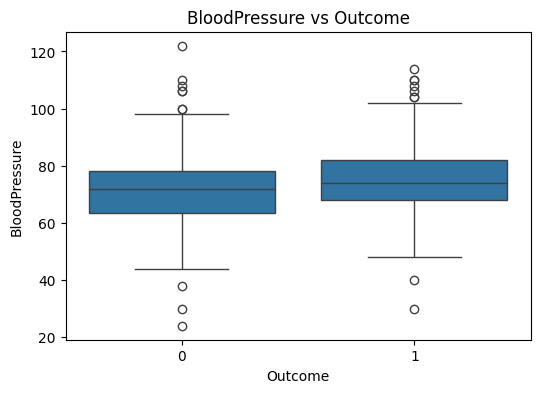

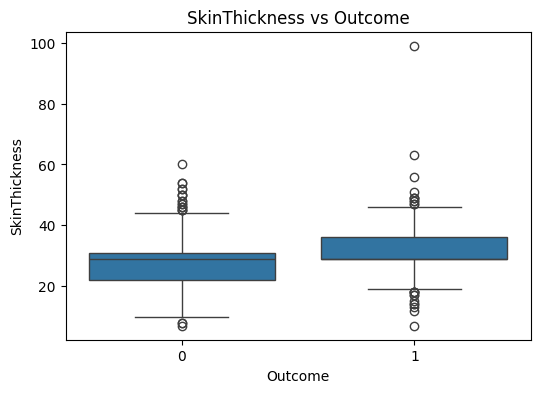

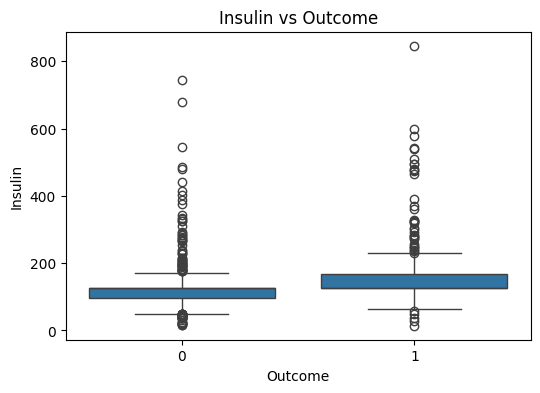

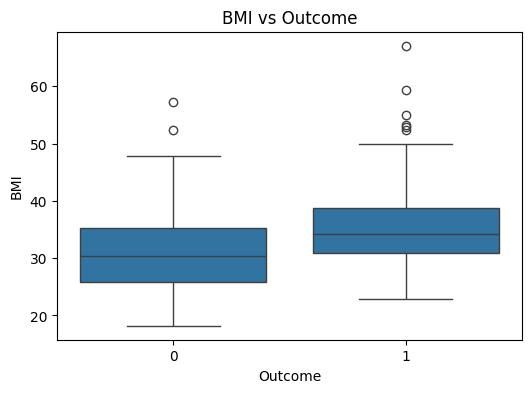

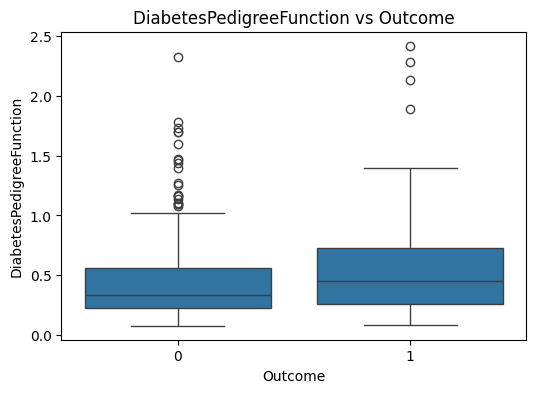

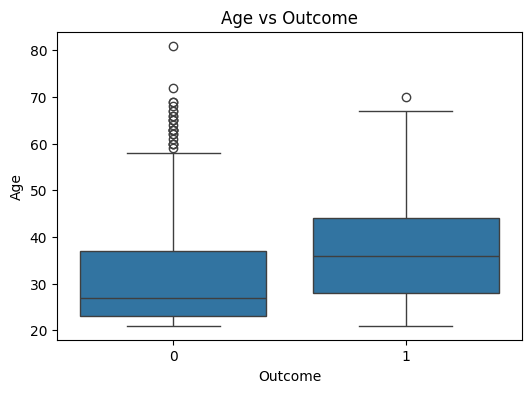

In [8]:
# Visualización bivariada
for col in df_clean.columns[:-1]:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_clean, x='Outcome', y=col)
    plt.title(f'{col} vs Outcome')
    plt.show()

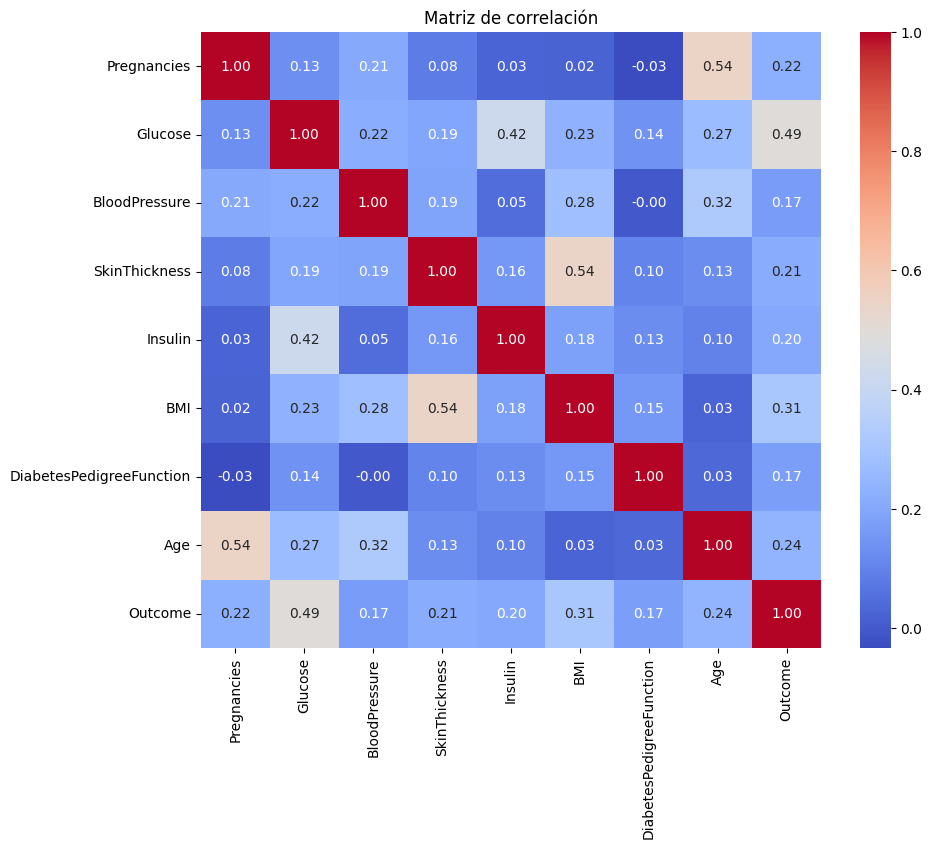

In [9]:
# Correlación
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

División de datos (Train/Test)

In [10]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("Outcome", axis=1)
y = df_clean["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Paso 3: Árbol de decisión

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

criterios = ["gini", "entropy", "log_loss"]

for crit in criterios:
    model = DecisionTreeClassifier(criterion=crit, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- Resultados con criterio: {crit} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


--- Resultados con criterio: gini ---
Accuracy: 0.7207792207792207
[[76 23]
 [20 35]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


--- Resultados con criterio: entropy ---
Accuracy: 0.7207792207792207
[[76 23]
 [20 35]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


--- Resultados con criterio: log_loss ---
Accuracy: 0.7207792207792207
[[76 23]
 [20 35]]
              precision    recall  f1-score   support

           0       0.79

# Paso 4: Optimización con GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor score:", grid.best_score_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor score: 0.7556977209116353


Visualizar el árbol

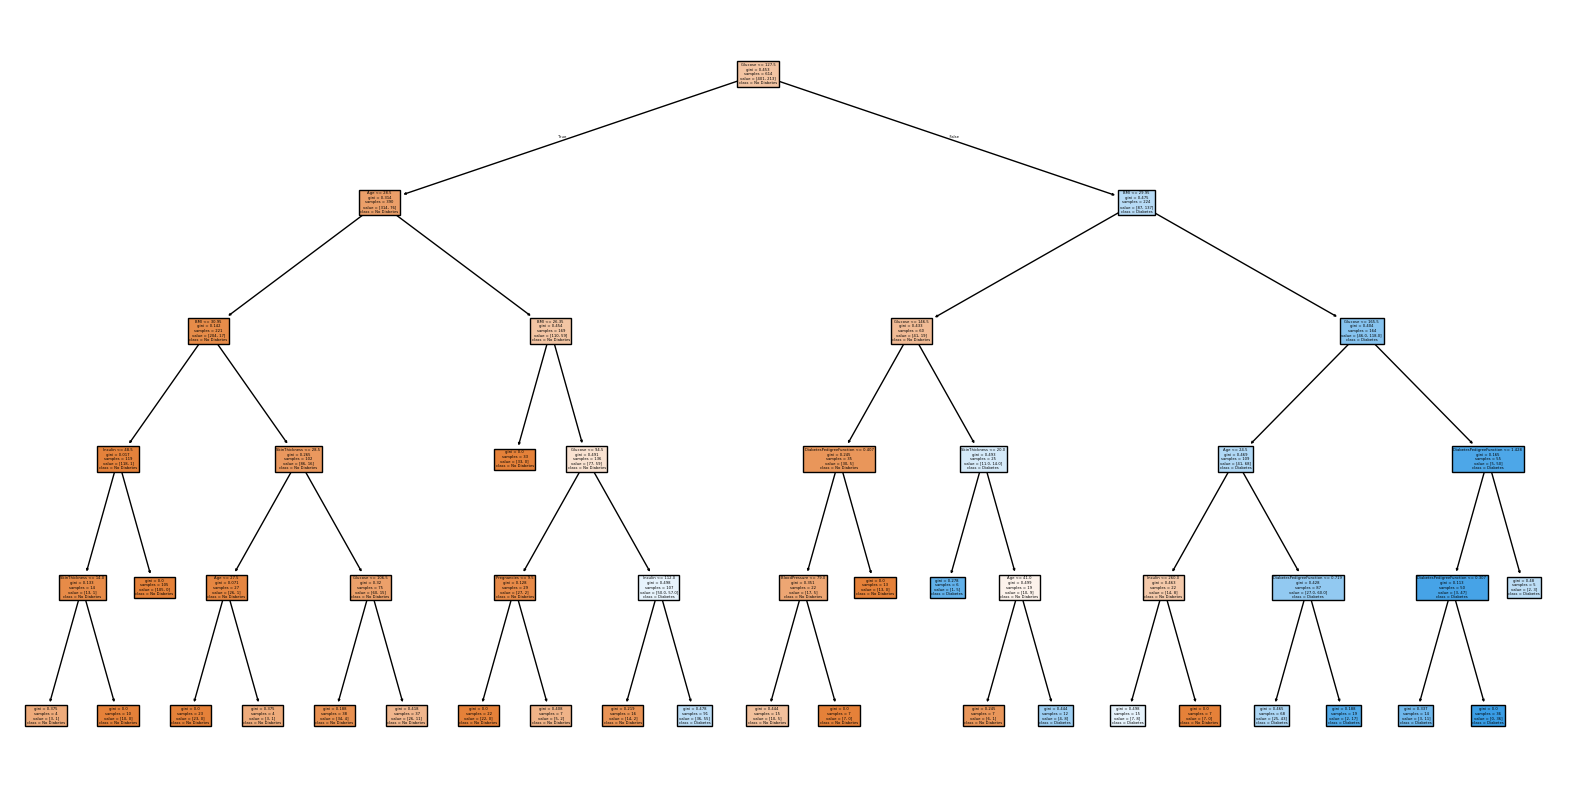

In [13]:
final_model = grid.best_estimator_

plt.figure(figsize=(20,10))
tree.plot_tree(final_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()